In [ ]:
### A random forest done on company data with target sales to find what the company is interested in knowing
## about the segment or attributes that cause high sales.

In [70]:
## import library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

In [11]:
company_data = pd.read_csv("D:/Lecture file/25 th lecture 29 march/10. Random Forests/Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
company_data.shape

(400, 11)

## data cleaning 

In [13]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [14]:
sales_cat = []
for num in company_data['Sales']:
     if num <5 :
         sales_cat.append("Low")
     elif  num >= 5 and  num < 8 :
         sales_cat.append("Average")
     else:
         sales_cat.append("High")
company_data['sales_cat'] = sales_cat

In [16]:
company_data_drop = company_data.drop(columns =['Sales'])
company_data_drop

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Average
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Average
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Average
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Average


In [27]:
categories_data = company_data_drop.select_dtypes(include='object')

In [30]:
categories_data

,ShelveLoc,Urban,US,sales_cat
0,Bad,Yes,Yes,High
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,High
3,Medium,Yes,Yes,Average
4,Bad,Yes,No,Low
...,...,...,...,...
395,Good,Yes,Yes,High
396,Medium,No,Yes,Average
397,Medium,Yes,Yes,Average
398,Bad,Yes,Yes,Average


In [32]:
le = LabelEncoder()
company_data_encoded = company_data_drop.copy()

for col in categories_data :
    company_data_encoded[col] = le.fit_transform(company_data_encoded[col])

In [34]:
company_data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


## Assiging value to variable

In [38]:

X = company_data_encoded.iloc[:,0:10]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [39]:
y = company_data_encoded.iloc[:,-1]
y

0      1
1      1
2      1
3      0
4      2
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_cat, Length: 400, dtype: int32

## Random foresting model

In [43]:
## importing Random forrest libarary
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [45]:
Rf_company_data = RandomForestClassifier(criterion='entropy') 

In [47]:
Rf_company_data.fit(X, y)

RandomForestClassifier(criterion='entropy')

In [49]:
Rf_company_data.feature_importances_

array([0.11990121, 0.11506533, 0.09744781, 0.10039264, 0.21341667,
       0.1134429 , 0.13587293, 0.06835824, 0.01636337, 0.01973891])

In [51]:
Rf_data_predict = Rf_company_data.predict(X)
Rf_data_predict

array([1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1,

In [53]:
ac_data =accuracy_score(y,Rf_data_predict)*100
print(f'Accuracy of the company data by random forresting modeling is : {ac_data} %')

Accuracy of the company data by random forresting modeling is : 100.0 %


In [55]:
cm_data =confusion_matrix(y,Rf_data_predict )
print(f'By confusion matrix : \n {cm_data}')

By confusion matrix : 
 [[159   0   0]
 [  0 164   0]
 [  0   0  77]]


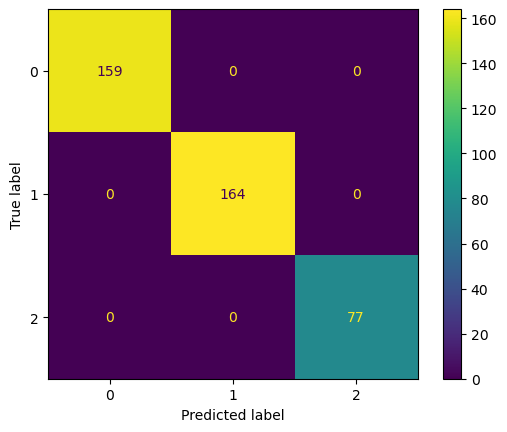

In [62]:
cd = ConfusionMatrixDisplay(cm_data,display_labels=Rf_company_data.classes_)
cd.plot()
plt.savefig('D:/confusion matrix.png')

In [72]:
## saving the model

In [76]:
joblib.dump(Rf_company_data ,'company_data_RD_v1.joblib')

['company_data_RD_v1.joblib']